## Recurrent Neural Network

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist

sns.set()

In [190]:
# load mnist of handwritten digits data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train/255
X_test  = X_test/255

idx = np.random.permutation(60000)
X_train = X_train[idx,:,:]
Y_train = Y_train[idx]

X_train, X_valid = X_train[6000:,:,:], X_train[:6000,:,:]
Y_train, Y_valid = Y_train[6000:], Y_train[:6000]

In [191]:
m = X_train.shape[0]
n_x = 28
T_x = 28
n_a = 50
n_y = 10

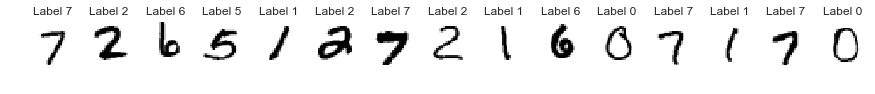

In [192]:
example_num = 15
plt.figure(figsize=(example_num,1))

for i in range(example_num):
    plt.subplot(1,example_num,i+1)
    plt.imshow(X_train[i,:,:],cmap=plt.cm.gray_r)
    plt.title('Label {}'.format(Y_train[i]))
    plt.grid(False)
    plt.axis('off')
plt.show()

In [193]:
batch_size = 512
n_batch = m // batch_size 

print(n_batch)

mini_batches = [] 
for i in range(n_batch): 
    idx = np.arange(i*batch_size,(i + 1)*batch_size)
    #print(idx)
    mini_batchX = X_train[idx,:,:]
    mini_batchY = Y_train[idx] 
    mini_batches.append((mini_batchX, mini_batchY)) 
    
if m % batch_size != 0: 
    idx = np.arange((i+1)*batch_size,m)
    #print(idx)
    mini_batchX = X_train[idx,:,:]
    mini_batchY = Y_train[idx] 
    mini_batches.append((mini_batchX, mini_batchY)) 


105


In [195]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32,shape=(None,n_x,T_x),name='X')
Y = tf.placeholder(dtype=tf.int32,shape=(None,),name='Y')


Wax = tf.get_variable('Wax',shape=(n_x,n_a),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
Waa = tf.get_variable('Waa',shape=(n_a,n_a),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
ba = tf.get_variable('ba',shape=(1,n_a),dtype=tf.float32,initializer=tf.zeros_initializer())
    
Wya = tf.get_variable('Wya',shape=(n_a,n_y),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
by = tf.get_variable('by',shape=(1,n_y),dtype=tf.float32,initializer=tf.zeros_initializer())

X_seq = tf.unstack(X,num=T_x,axis=2)

prev_state = tf.zeros((1,n_a))
for t in range(T_x):
    current_state = tf.tanh(tf.matmul(X_seq[t],Wax) + tf.matmul(prev_state,Waa) + ba)
    prev_state = current_state

Z = tf.matmul(current_state,Wya) + by

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y,logits=Z))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Y_pred = tf.argmax(tf.nn.softmax(Z),axis=1,output_type=tf.int32)
accr = 100*tf.reduce_mean(tf.cast(tf.equal(Y_pred,Y), tf.float32))


epoch_num = 10
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    print('starting cost = %.4f' % sess.run(cost,feed_dict={X:X_train,Y:Y_train}))
    
    for i in range(epoch_num):
        
        for mini_batch in mini_batches:
            mini_batchX, mini_batchY = mini_batch
            
            _,cost_val = sess.run([optimizer,cost],feed_dict={X:mini_batchX,Y:mini_batchY})
        
        valid_accr = sess.run(accr,feed_dict={X:X_valid,Y:Y_valid})
        train_accr = sess.run(accr,feed_dict={X:X_train,Y:Y_train})
        
        print('cost after %2d epoch = %.4f, train accuracy = %.2f%%, validation accuracy = %.2f%%' % (i,cost_val,train_accr,valid_accr))
    

starting cost = 2.3718
cost after  0 epoch = 1.0318, train accuracy = 68.06%, validation accuracy = 67.60%
cost after  1 epoch = 0.7082, train accuracy = 77.97%, validation accuracy = 77.73%
cost after  2 epoch = 0.6119, train accuracy = 81.53%, validation accuracy = 81.12%
cost after  3 epoch = 0.4721, train accuracy = 85.33%, validation accuracy = 84.67%
cost after  4 epoch = 0.4048, train accuracy = 87.97%, validation accuracy = 87.55%
cost after  5 epoch = 0.3412, train accuracy = 89.74%, validation accuracy = 89.70%
cost after  6 epoch = 0.2786, train accuracy = 90.68%, validation accuracy = 90.52%
cost after  7 epoch = 0.2388, train accuracy = 91.22%, validation accuracy = 90.97%
cost after  8 epoch = 0.2143, train accuracy = 91.70%, validation accuracy = 91.57%
cost after  9 epoch = 0.1977, train accuracy = 92.28%, validation accuracy = 92.05%
